In [1]:
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv(r'D:\MachineLearning\data\airlines_task.csv')

In [3]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,400740,XE,3036,IAH,CHS,4.0,1195,131.0,0
1,194808,UA,315,DEN,ONT,7.0,707,145.0,0
2,526903,OO,6673,SFO,MRY,5.0,499,42.0,1
3,477937,WN,3668,PHX,ONT,2.0,810,70.0,1
4,48180,AS,623,LAS,PDX,5.0,985,143.0,0


In [4]:
data = data.drop(columns=['id'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      399264 non-null  object 
 1   Flight       400000 non-null  int64  
 2   AirportFrom  400000 non-null  object 
 3   AirportTo    398843 non-null  object 
 4   DayOfWeek    399673 non-null  float64
 5   Time         400000 non-null  int64  
 6   Length       399517 non-null  float64
 7   Delay        400000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 24.4+ MB


In [6]:
data.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,400000.000000,399673.000000,400000.000000,399517.000000,400000.000000
mean,2455.453042,3.953024,787.657613,131.069739,0.252202
std,2078.725805,1.845640,282.725426,69.368934,0.434277
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,710.000000,3.000000,540.000000,81.000000,0.000000
50%,1848.000000,4.000000,775.000000,115.000000,0.000000
75%,3793.250000,5.000000,1025.000000,160.000000,1.000000
max,7813.000000,7.000000,1439.000000,655.000000,1.000000


## Обрабатываем пропущенные значения

In [7]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

AirportTo      0.28925
Airline        0.18400
Length         0.12075
DayOfWeek      0.08175
AirportFrom    0.00000
Flight         0.00000
Time           0.00000
Delay          0.00000
dtype: float64

Видим, что процент пропущенных значений крайне мал, поэтому удалим объекты с пропущенными значениями

In [8]:
data = data.dropna()

Изменим типы данных

In [9]:
data['DayOfWeek'] = data['DayOfWeek'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397307 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      397307 non-null  object 
 1   Flight       397307 non-null  int64  
 2   AirportFrom  397307 non-null  object 
 3   AirportTo    397307 non-null  object 
 4   DayOfWeek    397307 non-null  int64  
 5   Time         397307 non-null  int64  
 6   Length       397307 non-null  float64
 7   Delay        397307 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 27.3+ MB


In [10]:
print(data.duplicated().sum())
data = data.drop_duplicates()

143260


In [11]:
data['Airline'].value_counts()

Airline
WN    43548
DL    30622
OO    26939
XE    16835
AA    15936
UA    15401
US    14925
EV    14688
MQ    13843
FL    10833
9E    10810
CO    10781
B6     6955
OH     6536
YV     6273
AS     4747
F9     2542
HA     1833
Name: count, dtype: int64

In [12]:
data['AirportFrom'].value_counts()

AirportFrom
ATL    17581
ORD    11806
DEN    10058
DFW     8800
IAH     8289
       ...  
DBQ        8
SJT        7
GUM        7
ADK        3
ABR        1
Name: count, Length: 293, dtype: int64

In [13]:
data['AirportTo'].value_counts()

AirportTo
ATL    17134
ORD    11676
DEN    10162
IAH     8148
DFW     8140
       ...  
PIE        8
SJT        8
BLI        7
ADK        2
ABR        1
Name: count, Length: 293, dtype: int64

In [14]:
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,XE,3036,IAH,CHS,4,1195,131.0,0
1,UA,315,DEN,ONT,7,707,145.0,0
2,OO,6673,SFO,MRY,5,499,42.0,1
3,WN,3668,PHX,ONT,2,810,70.0,1
4,AS,623,LAS,PDX,5,985,143.0,0


Видим, что у категориальных признаков много уникальных значений

# EDA

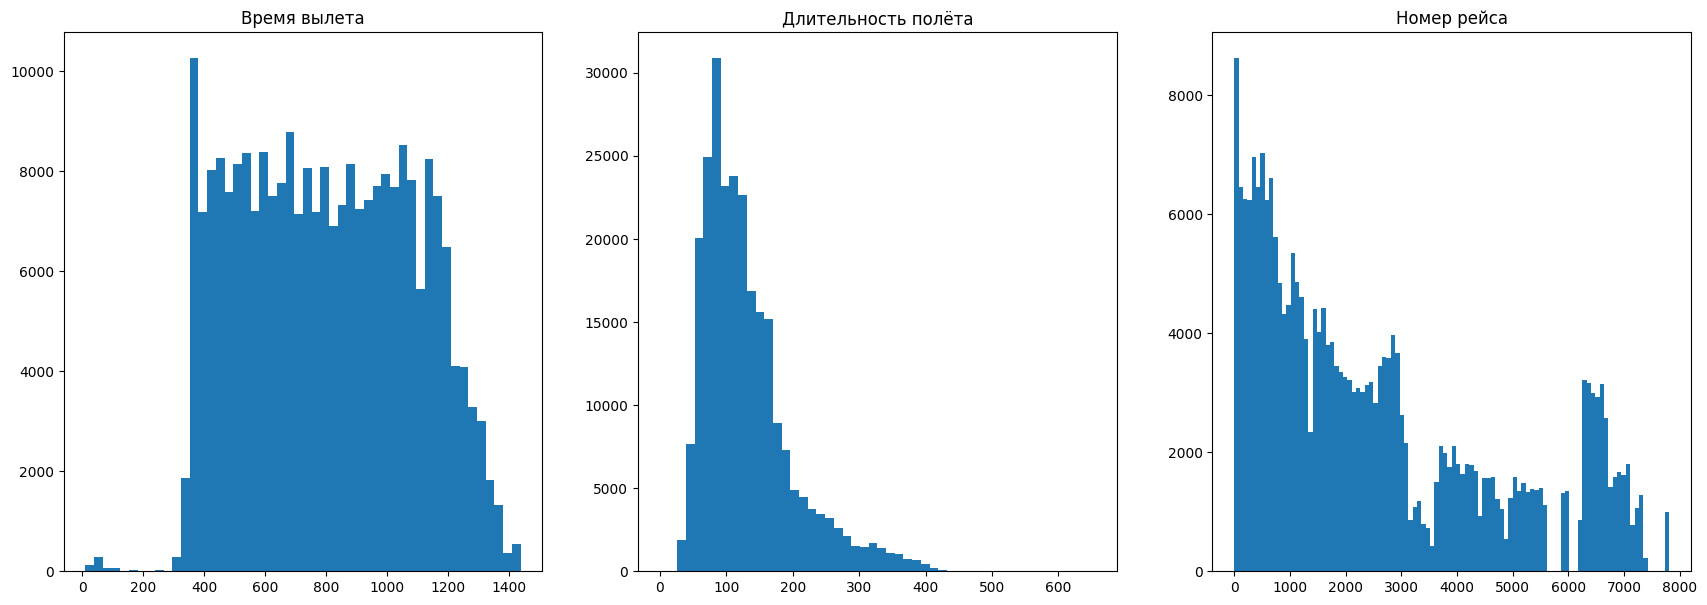

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
axs[0].hist(data['Time'], bins=50)
axs[0].set_title('Время вылета')

axs[1].hist(data['Length'], bins=50)
axs[1].set_title('Длительность полёта')

axs[2].hist(data['Flight'], bins=100)
axs[2].set_title('Номер рейса')
plt.show()

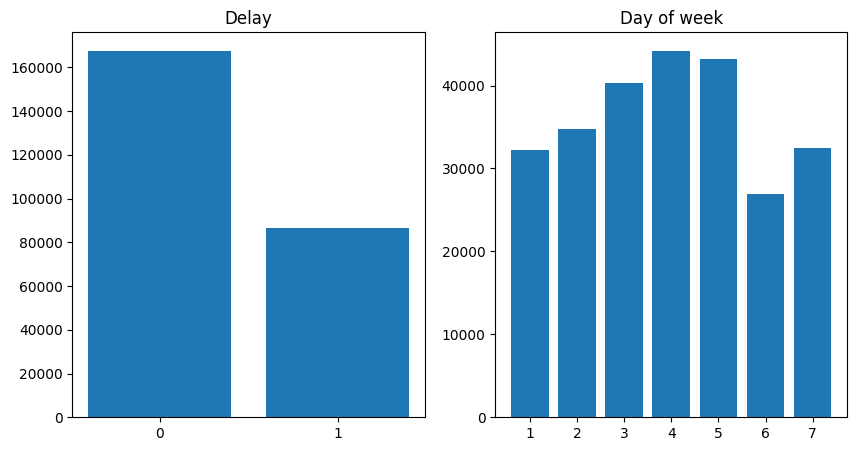

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
delay = data['Delay'].value_counts().sort_index()
axs[0].bar(delay.index, height=delay.values)
axs[0].set_xticks(delay.index)
axs[0].set_title('Delay')

day_of_week = data['DayOfWeek'].value_counts().sort_index()
axs[1].bar(day_of_week.index, height=day_of_week.values)
axs[1].set_xticks(day_of_week.index)
axs[1].set_title('Day of week')

plt.show()

## Удалим выбросы методом межквартильного размаха

In [17]:
outliers = data[['Time', 'Length', 'Flight']]

In [18]:
Q1 = outliers.quantile(0.25)
Q1

Time      565.0
Length     81.0
Flight    739.0
Name: 0.25, dtype: float64

In [19]:
Q3 = outliers.quantile(0.75)
Q3

Time      1035.0
Length     160.0
Flight    3979.0
Name: 0.75, dtype: float64

In [20]:
IQR = Q3 - Q1
data_filtered = outliers[~((outliers < (Q1 - 1.5 * IQR)) |(outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Time,Length,Flight
0,1195,131.0,3036
1,707,145.0,315
2,499,42.0,6673
3,810,70.0,3668
4,985,143.0,623
...,...,...,...
399987,910,62.0,2699
399992,985,80.0,3995
399993,652,138.0,6474
399996,365,107.0,486


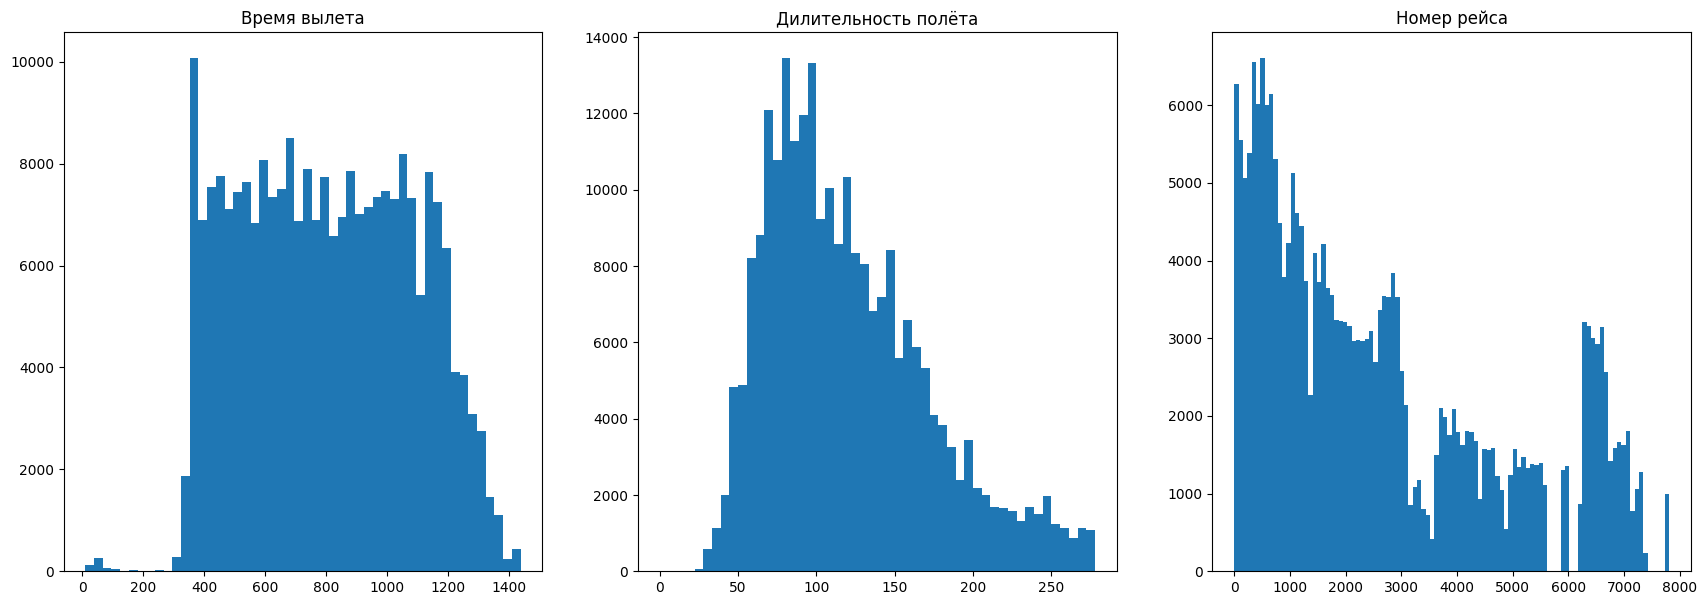

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
axs[0].hist(data_filtered['Time'], bins=50)
axs[0].set_title('Время вылета')

axs[1].hist(data_filtered['Length'], bins=50)
axs[1].set_title('Дилительность полёта')

axs[2].hist(data_filtered['Flight'], bins=100)
axs[2].set_title('Номер рейса')
plt.show()

## Выводы по гистограмам

- В основном самолёты начинают вылетать в 5 часов утра. С 5 до 20 часов они вылетают примерно равномерно. После 20 часов начинается спад по числу вылетов
- График дилительности полётов скошен вправо, что говорит о существенной разнице между медианой и среднем
- В датасете много повторяющихся данных, о чём говорит график номера рейса

In [22]:
data_filtered['Flight'].value_counts()

Flight
9       165
5       148
491     144
312     141
511     139
       ... 
7383      1
3292      1
7396      1
5606      1
7319      1
Name: count, Length: 6578, dtype: int64

In [23]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,XE,3036,IAH,CHS,4,1195,131.0,0
1,UA,315,DEN,ONT,7,707,145.0,0
2,OO,6673,SFO,MRY,5,499,42.0,1
3,WN,3668,PHX,ONT,2,810,70.0,1
4,AS,623,LAS,PDX,5,985,143.0,0


In [24]:
data_before_encoding = data_filtered.copy()
data_filtered

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,XE,3036,IAH,CHS,4,1195,131.0,0
1,UA,315,DEN,ONT,7,707,145.0,0
2,OO,6673,SFO,MRY,5,499,42.0,1
3,WN,3668,PHX,ONT,2,810,70.0,1
4,AS,623,LAS,PDX,5,985,143.0,0
...,...,...,...,...,...,...,...,...
399987,XE,2699,EWR,BWI,7,910,62.0,0
399992,MQ,3995,DAY,ORD,2,985,80.0,0
399993,OO,6474,PDX,LAX,6,652,138.0,0
399996,US,486,RNO,PHX,7,365,107.0,0


## Изучим категориальные признаки

In [25]:
(data_filtered.groupby(by='Airline')['Delay'].sum() / data_filtered.shape[0] * 100).sort_values(ascending=False)

Airline
WN    9.621518
DL    3.645818
OO    3.496477
AA    2.213636
XE    1.907508
MQ    1.808223
EV    1.649781
US    1.627442
CO    1.623719
9E    1.242714
UA    1.101647
B6    0.948583
FL    0.932449
YV    0.575438
OH    0.497251
AS    0.437680
F9    0.408308
HA    0.208084
Name: Delay, dtype: float64

In [26]:
(data_filtered.groupby(by='AirportFrom')['Delay'].sum() / data_filtered.shape[0] * 100).sort_values(ascending=False)

AirportFrom
ATL    1.981558
ORD    1.670879
DEN    1.424322
DFW    1.295666
IAH    1.281187
         ...   
ADK    0.000414
GTR    0.000414
HTS    0.000414
ABR    0.000000
SJT    0.000000
Name: Delay, Length: 292, dtype: float64

In [27]:
(data_filtered.groupby(by='AirportTo')['Delay'].sum() / data_filtered.shape[0] * 100).sort_values(ascending=False)

AirportTo
ATL    1.870276
ORD    1.333725
DEN    1.311800
DFW    1.046627
IAH    1.031320
         ...   
PIE    0.000827
SJT    0.000827
BLI    0.000414
ABR    0.000000
ADK    0.000000
Name: Delay, Length: 292, dtype: float64

Закодируем категориальные признаки

In [28]:
airline_chance = (data_filtered.groupby(by='Airline')['Delay'].sum() / data_filtered.shape[0]).sort_values(ascending=False)
data_filtered.loc[:, 'Airline'] = data_filtered['Airline'].map(airline_chance)
data_filtered = data_filtered.copy()
data_filtered['Airline'] = pd.to_numeric(data_filtered['Airline'])

In [29]:
airport_from_chance = (data_filtered.groupby(by='AirportFrom')['Delay'].sum() / data_filtered.shape[0] * 100).sort_values(ascending=False)
data_filtered.loc[:, 'AirportFrom'] = data_filtered['AirportFrom'].map(airport_from_chance)
data_filtered = data_filtered.copy()
data_filtered['AirportFrom'] = pd.to_numeric(data_filtered['AirportFrom'])

In [30]:
airport_from_chance = (data_filtered.groupby(by='AirportTo')['Delay'].sum() / data_filtered.shape[0] * 100).sort_values(ascending=False)
data_filtered.loc[:, 'AirportTo'] = data_filtered['AirportTo'].map(airport_from_chance)
data_filtered = data_filtered.copy()
data_filtered['AirportTo'] = pd.to_numeric(data_filtered['AirportTo'])
data_filtered.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,0.019075,3036,1.281187,0.064535,4,1195,131.0,0
1,0.011016,315,1.424322,0.183677,7,707,145.0,0
2,0.034965,6673,0.785177,0.026062,5,499,42.0,1
3,0.096215,3668,0.975473,0.183677,2,810,70.0,1
4,0.004377,623,0.920866,0.292063,5,985,143.0,0


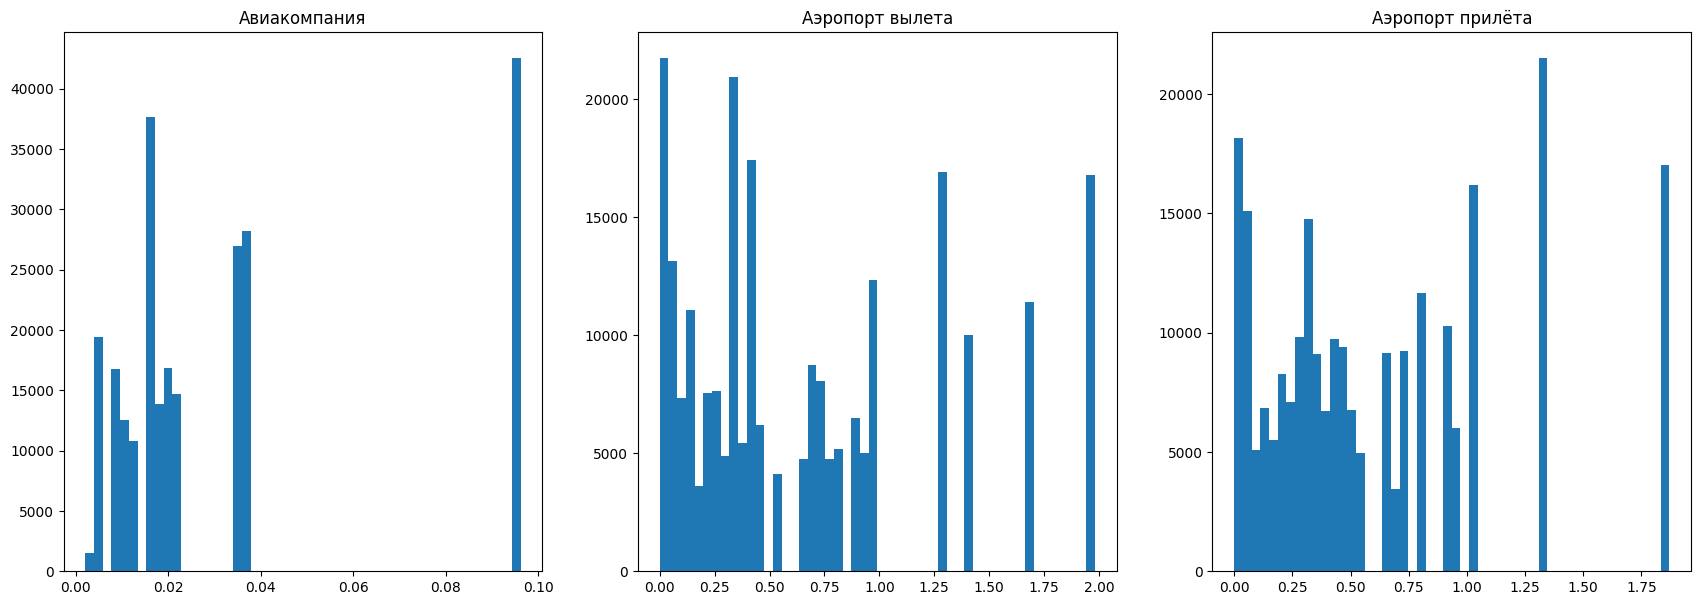

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
axs[0].hist(data_filtered['Airline'], bins=50)
axs[0].set_title('Авиакомпания')

axs[1].hist(data_filtered['AirportFrom'], bins=50)
axs[1].set_title('Аэропорт вылета')

axs[2].hist(data_filtered['AirportTo'], bins=50)
axs[2].set_title('Аэропорт прилёта')
plt.show()

## Поиск зависимостей

In [32]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241729 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      241729 non-null  float64
 1   Flight       241729 non-null  int64  
 2   AirportFrom  241729 non-null  float64
 3   AirportTo    241729 non-null  float64
 4   DayOfWeek    241729 non-null  int64  
 5   Time         241729 non-null  int64  
 6   Length       241729 non-null  float64
 7   Delay        241729 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 16.6 MB


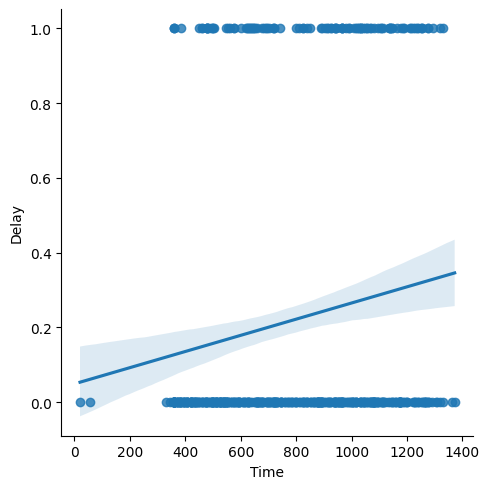

In [33]:
sns.lmplot(data_filtered[:500], x='Time', y='Delay')

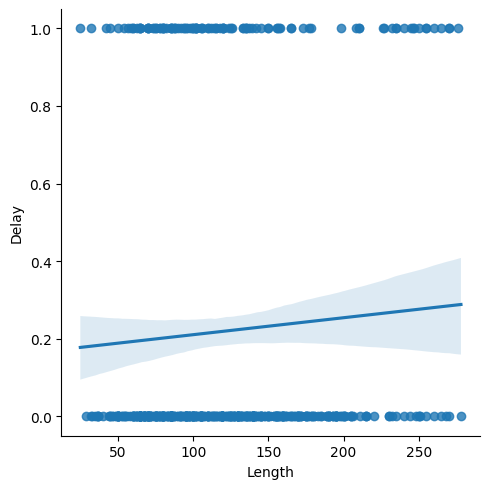

In [34]:
sns.lmplot(data_filtered[:500], x='Length', y='Delay')

In [35]:
corr = data_filtered.corr()

<Axes: >

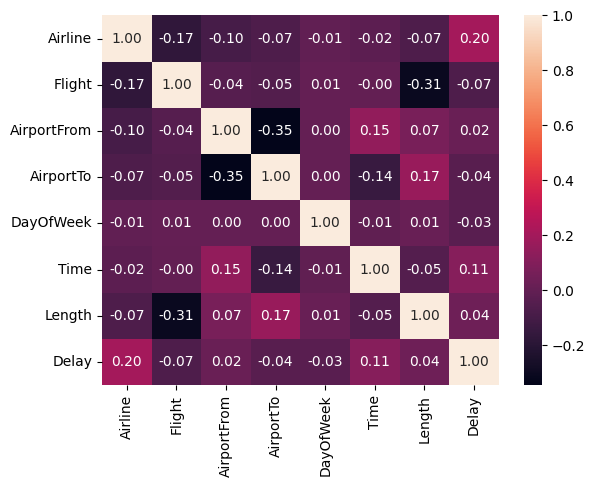

In [36]:
sns.heatmap(corr, annot=True, fmt='.2f')

In [37]:
data_filtered.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,0.019075,3036,1.281187,0.064535,4,1195,131.0,0
1,0.011016,315,1.424322,0.183677,7,707,145.0,0
2,0.034965,6673,0.785177,0.026062,5,499,42.0,1
3,0.096215,3668,0.975473,0.183677,2,810,70.0,1
4,0.004377,623,0.920866,0.292063,5,985,143.0,0


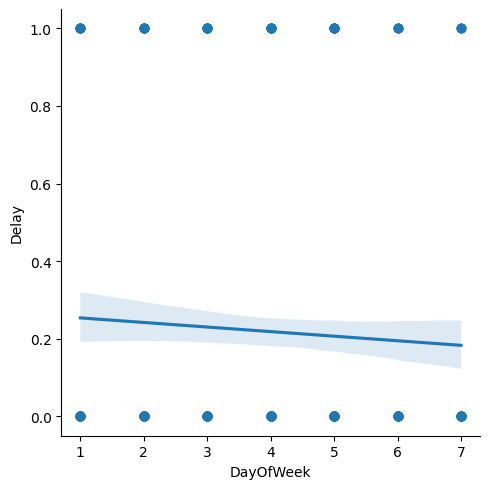

In [38]:
sns.lmplot(data_filtered[:500], x='DayOfWeek', y='Delay')

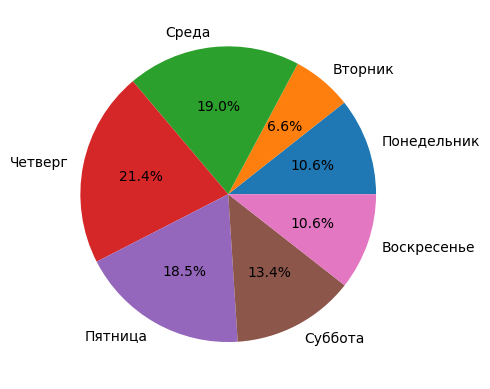

In [39]:
days_delay = data_filtered.groupby(by='DayOfWeek')['Delay'].sum().sort_index(ascending=False)
labels = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
fig, axs = plt.subplots()
axs.pie(days_delay, labels=labels, autopct='%1.1f%%')
plt.show()

Видим, что чаще всего задержки происходят по средам, четвргам и пятницам

In [40]:
data_filtered.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,241729.000000,241729.000000,241729.000000,241729.000000,241729.000000,241729.000000,241729.000000,241729.000000
mean,0.033533,2638.435024,0.678439,0.625339,3.949071,802.252229,120.658911,0.339463
std,0.030546,2149.913934,0.586039,0.515268,1.894855,277.339060,51.853812,0.473528
min,0.002081,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,0.012427,808.000000,0.216772,0.240765,2.000000,568.000000,80.000000,0.000000
50%,0.019075,2039.000000,0.431061,0.464570,4.000000,795.000000,110.000000,0.000000
75%,0.036458,4117.000000,0.975473,0.946928,5.000000,1035.000000,152.000000,1.000000
max,0.096215,7813.000000,1.981558,1.870276,7.000000,1439.000000,278.000000,1.000000


In [41]:
data_filtered = data_filtered.query('Length > 0')

In [42]:
data_filtered.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,241725.000000,241725.000000,241725.000000,241725.000000,241725.000000,241725.000000,241725.000000,241725.000000
mean,0.033534,2638.475338,0.678436,0.625334,3.949029,802.253420,120.660908,0.339464
std,0.030546,2149.908773,0.586042,0.515269,1.894841,277.339271,51.851918,0.473528
min,0.002081,1.000000,0.000000,0.000000,1.000000,10.000000,24.000000,0.000000
25%,0.012427,808.000000,0.216772,0.240765,2.000000,568.000000,80.000000,0.000000
50%,0.019075,2039.000000,0.431061,0.464570,4.000000,795.000000,110.000000,0.000000
75%,0.036458,4117.000000,0.975473,0.946928,5.000000,1035.000000,152.000000,1.000000
max,0.096215,7813.000000,1.981558,1.870276,7.000000,1439.000000,278.000000,1.000000


In [43]:
data_filtered['Delay'].value_counts()

Delay
0    159668
1     82057
Name: count, dtype: int64

In [44]:
data_filtered.query('AirportFrom == AirportTo')

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay


## Результаты поиска зависимостей

- Было выяснено, что чаще всего задержки происходят по средам, четвергам и пятницам
- Существует небольшая корреляция между самолётом и тем, будет задежка или нет
- Видно, что чем позже вылет, тем больше задержек совершается. Это будет видно также в дальнейшем

## Попробуем закодировать категориальные признаки с помощью BinaryEncoder

In [45]:
bin_encoder = ce.binary.BinaryEncoder(cols=['Airline', 'AirportTo', 'AirportFrom'])
data_bin_encoding = bin_encoder.fit_transform(data_before_encoding)
data_bin_encoding.to_csv(r"D:\MachineLearning\data\airlines_bin_encoding.csv")

In [50]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию исходных данных
label_encoding_data = data_before_encoding.copy()  # Исправлено имя переменной (если было опечатано)

# Инициализируем LabelEncoder
le = LabelEncoder()

# Объединяем ВСЕ категориальные данные для обучения энкодера
# (если столбца "Airline" нет в данных - удалите его из списка)
all_categories = (
    label_encoding_data["AirportFrom"].tolist() +
    label_encoding_data["AirportTo"].tolist() +
    label_encoding_data["Airline"].tolist()  # Если столбец существует
)

le.fit(all_categories)

# Применяем кодирование к каждому столбцу
label_encoding_data["AirportFrom"] = le.transform(label_encoding_data["AirportFrom"])  # Исправлено: le.transform()
label_encoding_data["AirportTo"] = le.transform(label_encoding_data["AirportTo"])     # вместо data_before_encoding.transform()
label_encoding_data["Airline"] = le.transform(label_encoding_data["Airline"])         # Если столбец существует

# Сохраняем результат (исправлена опечатка в названии файла: "label" вместо "lable")
label_encoding_data.to_csv(r"D:\MachineLearning\data\airlines_label_encoding.csv")

### Попытаемся понять, в какое время вылета чаще всего происходят задержки

In [ ]:
fig, axs = plt.subplots()
axs.hist(data_filtered['Time'], bins=50)
axs.set_title('Время вылета')

In [ ]:
print(data_filtered[(data_filtered['Time'] > 200) & (data_filtered['Time'] < 1200)]['Delay'].sum() / data_filtered[(data_filtered['Time'] > 200) & (data_filtered['Time'] < 1200)].shape[0]*100)
print(data_filtered[(data_filtered['Time'] <= 200) | (data_filtered['Time'] >= 1200)]['Delay'].sum() / data_filtered[(data_filtered['Time'] <= 200) | (data_filtered['Time'] >= 1200)].shape[0]*100)

### Ночью, утром и днём задержки происходят почти одинаков часто

### Разделим сутки на части и посмотрим, когда наиболее часто происходят задержки

In [ ]:
n = 50
intervals = np.linspace(0, 1440, n+1)
percent_delay = []
for i in range(len(intervals) - 1):
    percent_delay.append(data_filtered.query(f'Time >= {intervals[i]} & Time < {intervals[i+1]}')['Delay'].sum() / data_filtered.shape[0]*100)
    
fig, axs = plt.subplots()
axs.bar(intervals[:-1], height=percent_delay, width=1440/n)

### Вывод: наиболее часто задержки просходят с 05:00 утра до 20:00 вечера. После 20:00 число задержек резко падает

In [ ]:
data_filtered.head()

### Аналогично исследуем длительность полёта

In [ ]:
n = 100
intervals = np.linspace(data_filtered['Length'].min(), data_filtered['Length'].max(), n+1)
percent_delay = []
for i in range(len(intervals) - 1):
    percent_delay.append(data_filtered.query(f'Length >= {intervals[i]} & Length < {intervals[i+1]}')['Delay'].sum() / data_filtered.shape[0]*100)
    
fig, axs = plt.subplots()
axs.bar(intervals[:-1], height=percent_delay, width=data_filtered['Length'].max()/n)

### Вывод: наиболее часто задержки просходят, если длительность полёта в промежутке от 50 до 170

### Аналогично исследуем номер полёта полёта

In [ ]:
n = 100
intervals = np.linspace(data_filtered['Flight'].min(), data_filtered['Flight'].max(), n+1)
percent_delay = []
for i in range(len(intervals) - 1):
    percent_delay.append(data_filtered.query(f'Flight >= {intervals[i]} & Flight < {intervals[i+1]}')['Delay'].sum() / data_filtered.shape[0]*100)
    
fig, axs = plt.subplots()
axs.bar(intervals[:-1], height=percent_delay, width=data_filtered['Flight'].max()/n)

### Видим, что вероятность задержки с возрастанием номера полёта падает

## Исследуем графики BoxPlot

In [ ]:
data_filtered.boxplot(by='DayOfWeek', column=['Length'])

In [ ]:
data_filtered.boxplot(by='DayOfWeek', column=['Time'])

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
axs[0].boxplot(x=data_filtered['Airline'])
axs[0].set_title('Самолёт')

axs[1].boxplot(x=data_filtered['AirportFrom'])
axs[1].set_title('Откуда')

axs[2].boxplot(x=data_filtered['AirportTo'])
axs[2].set_title('Куда')

In [ ]:
data_filtered.head()

# Общие выводы

1. В ходе анализа датасета были выявлены пустые значения признаков, после этого они были обработаны: экземпляры с пустыми признаками удалялись, потому что их было немного
2. Было удалено много дубликатов
3. Были обработаны выбросы методом межквартильного размаха
4. Были преобразованы типы данных в датасете
5. Категориальные признаки были закодированы следующим образом: группировка экземпляров по этому признаку, вычисление процента рейсов с содержкой по этой группе. Этот процент вносился в признак

Наиболее значимым признаком оказался признак Airline
  
Для категориальных признаков использовались прямоугольные диаграммы, а для стальных - диаграммы рассеяния. Для нахождения корреляции между признаками использовалась HeatMap

- Было выяснено, что чаще всего задержки происходят по средам, четвергам и пятницам. Для этого использовался Pie
- Существует небольшая корреляция между самолётом и тем, будет задежка или нет
- Чем позже вылет, тем больше задержек совершается.
- Ночью, утром и днём задержки происходят почти одинаков часто
- Наиболее часто задержки происходят, если длительность полёта в промежутке от 50 до 170
- Вероятность задержки с возрастанием номера полёта падает

In [ ]:
data_filtered.to_csv(r'D:\MachineLearning\data\airlines_processed.csv')